In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

In [10]:
!cd /Users/mohamedabdelgawad/Desktop/final_model/yolov5 && python3 train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-450-g781b9d57 Python-3.13.7 torch-2.9.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, an

In [38]:
model = torch.hub.load(
    'ultralytics/yolov5', 
    'custom', 
    path='/Users/mohamedabdelgawad/Desktop/final_model/yolov5/runs/train/exp/weights/best.pt', 
    force_reload=True
)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/mohamedabdelgawad/.cache/torch/hub/master.zip


YOLOv5 🚀 2025-11-27 Python-3.13.7 torch-2.9.1 CPU

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [40]:
cap = cv2.VideoCapture('/Users/mohamedabdelgawad/Downloads/traffic.mp4')
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

/Users/mohamedabdelgawad/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/mohamedabdelgawad/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/mohamedabdelgawad/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/mohamedabdelgawad/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/mohamedabdelgawad

KeyboardInterrupt: 

/Users/mohamedabdelgawad/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:898: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


<class 'models.common.Detections'>
3


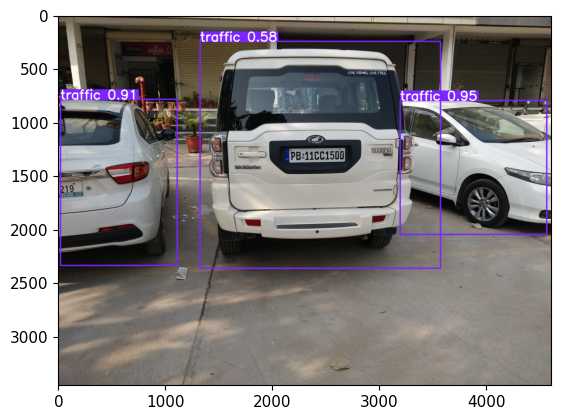

In [47]:
results = model("/Users/mohamedabdelgawad/Downloads/127.jpg")
print(type(results))
num_detections = len(results.pred[0])
print(num_detections)
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
import serial
import time # Recommended to wait for port initialization

# 1. FIX SYNTAX: Use 'serial.Serial' and replace the placeholder port
# Example Mac/Linux port: '/dev/cu.usbmodemXXXX' or Windows: 'COM3'
try:
    port = serial.Serial("/dev/cu.usbmodem1101", 9600) 
    time.sleep(2) # Give the port time to initialize (highly recommended)
    print("Serial port opened successfully.")
except serial.SerialException as e:
    print(f"Error opening port: {e}. Check if the port name is correct and if the Arduino is connected.")
    exit()

# Prepare the value you want to send
value_to_send = 180 

# 2. FIX LOGIC: Convert the integer to string and add the newline delimiter (\n)
data_string = str(value_to_send) + '\n'

# 3. FIX SYNTAX and send data: Convert the final string to bytes
# This line now sends "180\n"
port.write(data_string.encode("utf-8")) 
print(f"Sent value: {value_to_send}")

# Close the port once you're done
port.close()
print("Serial port closed.")

Error opening port: [Errno 2] could not open port /dev/cu.usbmodem1101: [Errno 2] No such file or directory: '/dev/cu.usbmodem1101'. Check if the port name is correct and if the Arduino is connected.


NameError: name 'port' is not defined

: 